1. Problem definition and scope
2. Data identification and selection
3. Data extraction, transformation and loading
4. Data exploration
5. Data cleaning
6. Data preparation
7. Data modelling and validation
8. Derivation of conclusion

## Problem definition and Scope

Assume that you're looking to purchase a HDB resale flat and would like to predict the transaction price of a unit based on its attributes, like location, unit size, remaining lease, etc. Create a simple predictive model that allows you to do that.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('C:\\Users\\user\\Documents\\Python\\Personal Learning\\Side Projects\\HDB resale price\\resale-flat-prices')
df= pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')

## Data Exploration

In [3]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

- The price of HDB resale flats can be based on some factors, some of which are in the dataset that was just extracted.
- Based on the columns, first cut probably the 'block' would not be very useful
- the 'street name' would only be useful if there are additional information of the surrounding amenities or its relative position to key amenities.
- It would be interesting to find out if the 'lease_commence_date' has a factor in the resale prices. 
- I would prioritise and take a look at these columns 'town','floor_area_sqm' and 'remaining lease' first


In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [5]:
df.count()

month                  58631
town                   58631
flat_type              58631
block                  58631
street_name            58631
storey_range           58631
floor_area_sqm         58631
flat_model             58631
lease_commence_date    58631
remaining_lease        58631
resale_price           58631
dtype: int64

- Total there are 58631 rows of resale data


In [6]:
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [7]:
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,58631.000000,58631.000000,58631.000000,5.863100e+04
mean,97.290421,1991.573059,74.013832,4.393404e+05
std,24.163741,11.262781,11.255427,1.412422e+05
min,31.000000,1966.000000,47.000000,9.050000e+04
25%,75.000000,1984.000000,66.000000,3.400000e+05
50%,96.000000,1989.000000,72.000000,4.100000e+05
75%,111.000000,2001.000000,83.000000,5.000000e+05
max,280.000000,2015.000000,97.000000,1.180000e+06


- There were no NaN or missing values

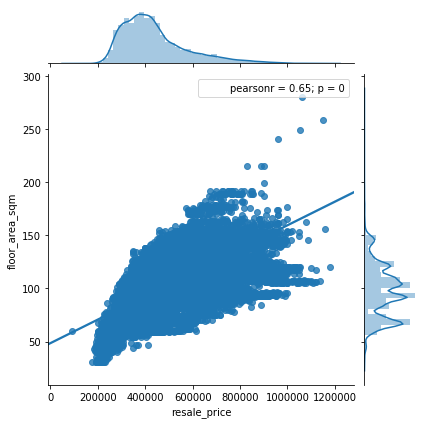

In [29]:
sns.jointplot(x='resale_price',y='floor_area_sqm',data=df,kind='reg')

Initial assessment shows that within the dataset, there is a general regression trend here between the resale price and the total floor area. There are some datapoints that seems to be outliers, which can be seen at the top-right corner of the plot.

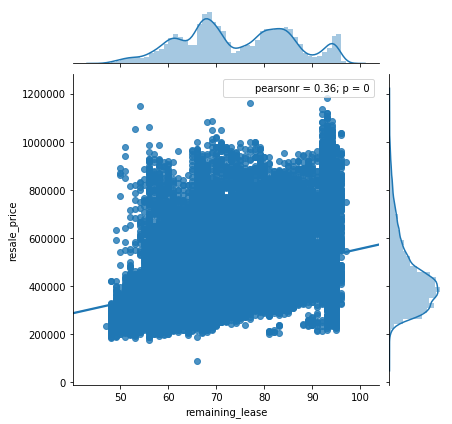

In [8]:
sns.jointplot(x='remaining_lease',y='resale_price',data=df,kind='reg')

- Initial assessment is there are no strong correlation between the resale prices and the remaining lease.
- This could be because the remaining lease dataset consist of resale flats from different towns and levels which could also influence the assessment. One way would be to group the remaining leases according to the housing type before checking for correlation

In [26]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

- Taking note to map these unique categorical values into numbers.
- initial thought would be north, south, east, west, central.
- Another method could be into 2 groups, mature or non-mature estates.
- Let us try encoding it into mature/non-mature estates

In [3]:
estates=df['town']
non_mature_estates=['BUKIT BATOK','BUKIT PANJANG','CHUA CHU KANG','HOUGANG','JURONG EAST','JURONG WEST','PUNGGOL','SENGKANG','SEMBAWANG','WOODLANDS','YISHUN']

In [5]:
result_array=np.array([])           # create empty numpy array
for x in estates:  
    if x in non_mature_estates:
        result_array = np.append(result_array, 'non-mature')
    else:
        result_array = np.append(result_array, 'mature')
        

  

In [6]:
print(result_array)

['mature' 'mature' 'mature' ..., 'non-mature' 'non-mature' 'non-mature']


In [7]:
np.unique(result_array)

array(['mature', 'non-mature'],
      dtype='<U32')

In [8]:
result_series= pd.Series(result_array,name='estate_type')
result_encode=pd.get_dummies(result_series,columns=['estate_type'])
result_encode.count()

mature        58631
non-mature    58631
dtype: int64

- converting the array containing 'mature' and 'non mature' into a series before doing one-hot encoding
- following, we will concatenate the result_array with the original dataframe. This would preserver the array information. Afterwhich, will concatenante the result_encode.

In [9]:
df2 = pd.concat([df,result_series],axis=1)
df2.head()
df3 = pd.concat([df2, result_encode],axis=1)
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,estate_type,mature,non-mature
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,mature,1,0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,mature,1,0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,mature,1,0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,mature,1,0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,mature,1,0


- Using one hot encoding to convert the estate_type column into usable values
- the 'town' information is ready
- Now, we will sort the 'remaining_lease' information according to whether they are in mature/non-mature estates

In [32]:
remaininglease_mature=np.array([]) 
remaininglease_nonmature=np.array([])
for x in df2['remaining_lease']:
    if df2['estate_type']=='mature':
        remaininglease_mature = np.append(remaininglease_mature, x)
    else:
        remaininglease_nonmature = np.append(remaininglease_nonmature,x)

print('remaininglease_mature')
print('remaininglease_nonmature')
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
remaininglease_mature=np.array([]) 
remaininglease_nonmature=np.array([])

while df2['estate_type']=='mature':
        remaininglease_mature = np.append(remaininglease_mature, x)
    else:
        remaininglease_nonmature = np.append(remaininglease_nonmature,x)

print('remaininglease_mature')
print('remaininglease_nonmature')
    

-Split data in X array for features to train on and Y for price prediction

## Data Modelling and Validation

In [11]:
df3.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'estate_type', 'mature',
       'non-mature'],
      dtype='object')

In [12]:
X=df3[['floor_area_sqm','mature','remaining_lease']]
y=df3['resale_price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(lm.intercept_)
print(lm.coef_)

-234883.556242
[   3515.06066264  115889.86096705    3707.00117161]


In [21]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
floor_area_sqm,3515.060663
mature,115889.860967
remaining_lease,3707.001172


- not too certain here
- from above table
    - an increase in 1 unit of floor area would result in 3515 times the price
    - an increase in 1 unit of remaining lease would result in 3707 times the price

In [22]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

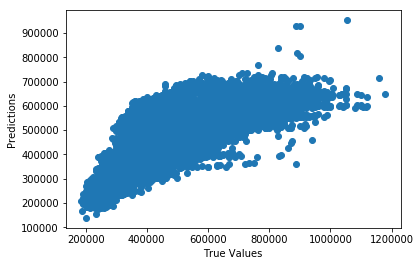

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

- the graph above would show the correlation between the predicted resale values and the test resale value. To a degree it shows that there is linear regression. However towards the higher end of the resale values, there seems to be more outliers.

- To evaluate the model, i will be using the R squared value, regression evaluation matric= mean squared error.
- R-squared is conveniently scaled between 0 and 1, whereas RMSE is not scaled to any particular values. R-squared can be more easily interpreted, but with RMSE we explicitly know how much our predictions deviate, on average, from the actual values in the dataset.

In [25]:
from sklearn import metrics

lm.score(X_test,y_test)

0.5873111671511797

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

91794.290738263153